In [ ]:
!pip install segmentation_models_pytorch --quiet
!pip install torchmetrics --quiet
!pip install einops --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 53.1 MB/s eta 0:00:00


# Extract paths

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("briscdataset/brisc2025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brisc2025' dataset.
Path to dataset files: /kaggle/input/brisc2025


In [ ]:
import os
os.listdir(path)

['brisc2025']

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os
import glob

TRAIN_DATA_PATH = os.path.join(path,'brisc2025/segmentation_task/train')
TEST_DATA_PATH = os.path.join(path, 'brisc2025/segmentation_task/test')
print(TRAIN_DATA_PATH, TEST_DATA_PATH)
# train_images = glob.glob(TRAIN_DATA_PATH + '/images/*.jpg')
# train_masks = glob.glob(TRAIN_DATA_PATH + '/masks/*.png')

/kaggle/input/brisc2025/brisc2025/segmentation_task/train /kaggle/input/brisc2025/brisc2025/segmentation_task/test


In [ ]:
arr = {'image_path' : [], 'mask_path': []}
for dirname, _, filenames in os.walk(TRAIN_DATA_PATH + '/images'):
    for filename in filenames:
        arr['image_path'].append(dirname + '/' + filename)
        arr['mask_path'].append(TRAIN_DATA_PATH + '/masks/' + filename.split('.jpg')[0] + '.png')

df_train = pd.DataFrame(arr)
display(df_train.shape)

arr = {'image_path' : [], 'mask_path': []}
for dirname, _, filenames in os.walk(TEST_DATA_PATH + '/images'):
    for filename in filenames:
        arr['image_path'].append(dirname + '/' + filename)
        arr['mask_path'].append(TEST_DATA_PATH + '/masks/' + filename.split('.jpg')[0] + '.png')

df_test = pd.DataFrame(arr)
display(df_test.shape)

(3933, 2)

(860, 2)

# Visualization

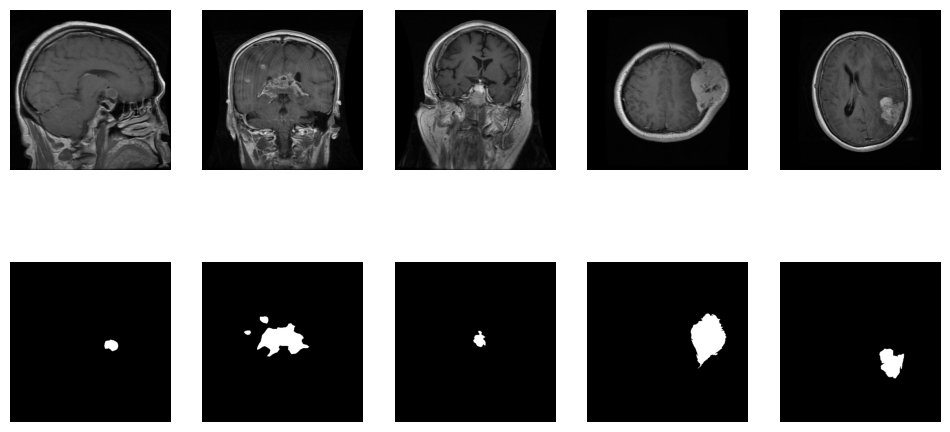

In [ ]:
def show_images():
    num_images = 5
    selected_images = df_train.sample(n=num_images)
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(num_images):
        image = Image.open(selected_images.iloc[i]['image_path'])
        # if len(np.array(image).shape)==3:
        #     image = np.array(image)
        #     new_channel_data = np.full_like(image[:, :, 0], fill_value=255)
        #     image[:, : , 0] = new_channel_data
        # print('Image shape:', np.array(image).shape)
        axes[0, i % num_images].imshow(image, cmap='gray')
        axes[0, i % num_images].axis('off')


        mask = Image.open(selected_images.iloc[i]['mask_path'])
        # print('Mask shape:', np.array(mask).shape)
        axes[1, i % num_images].imshow(mask, cmap='gray')
        axes[1, i % num_images].axis('off')
        # print('**********************')

    plt.show()

show_images()

In [ ]:
import pandas as pd

shape_analyze = {'shapes' : []}
for image in df_train.iterrows():
    current_img = Image.open(image[1]['image_path'])
    current_img = np.array(current_img)
    shape_analyze['shapes'].append(current_img.shape)

shape_analyze = pd.DataFrame(shape_analyze)
shape_analyze

shapes
0        (512, 512)
1        (512, 512)
2        (512, 512)
3        (512, 512)
4        (512, 512)
...             ...
3928  (512, 512, 3)
3929     (512, 512)
3930     (512, 512)
3931     (512, 512)
3932     (512, 512)

[3933 rows x 1 columns]

In [ ]:
shape_analyze.value_counts()

shapes         
(512, 512)         2272
(512, 512, 3)      1494
(256, 256, 3)        13
(256, 256)           12
(225, 225, 3)         8
                   ... 
(903, 721, 3)         1
(993, 825, 3)         1
(1280, 1280, 3)       1
(1365, 1365, 3)       1
(1427, 1275, 3)       1
Name: count, Length: 126, dtype: int64

In [ ]:
shape_analyze['channel'] = shape_analyze['shapes'].apply(lambda x : x[2] if len(x) == 3 else 0)
shape_analyze['channel'].value_counts()

channel
0    2284
3    1649
Name: count, dtype: int64

In [ ]:
selected_image = df_train.sample()
img = Image.open(selected_image.iloc[0]['image_path'])
img_arr = np.array(img)
np.unique(img_arr, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
mask_img = np.array(Image.open(selected_image.iloc[0]['mask_path']))

In [ ]:
mask_pixels = np.where(mask_img != 0)
zero_pixels = np.where(mask_img == 0)
mask_pixels

(array([216, 216, 216, ..., 287, 287, 287]),
 array([249, 252, 255, ..., 272, 277, 278]))

In [ ]:
lower_bound = np.min(img_arr[mask_pixels])
upper_bound = np.max(img_arr[mask_pixels])
lower_bound, upper_bound = max(0, lower_bound*0.9), min(upper_bound*1.1,  255)
lower_bound, upper_bound

(np.float64(5.4), np.float64(176.0))

(Text(0.5, 1.0, 'Mask'), ([], []), ([], []))

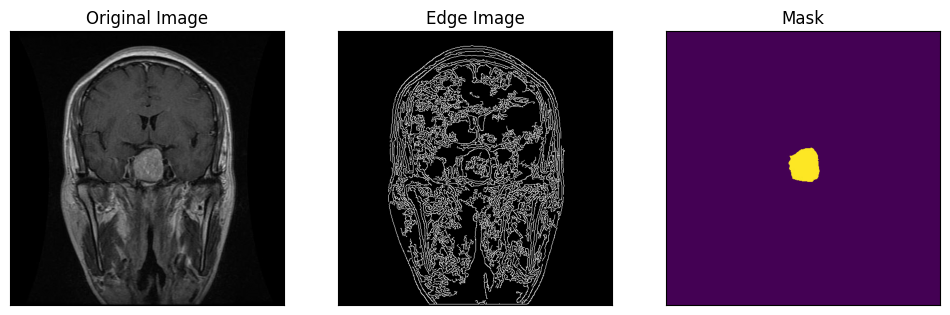

In [ ]:
!pip install opencv-python
import cv2 as cv

img = cv.imread(selected_image.iloc[0]['image_path'], cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, lower_bound, upper_bound)

plt.figure(figsize=(12,6))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Image.open(selected_image.iloc[0]['mask_path']))
plt.title('Mask'), plt.xticks([]), plt.yticks([])

In [ ]:
np.unique(mask_img[mask_pixels],return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7, 249, 250, 251, 252, 253, 254,
        255], dtype=uint8),
 array([ 161,   99,   54,   16,    6,    2,    2,    1,    5,   17,   41,
          84,  175, 2599]))

In [ ]:
mask_img.shape

(512, 512)

# Train validation split

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=36, shuffle=False) # shuffle when load
df_train.to_csv('train.csv')
df_val.to_csv('val.csv')
df_test.to_csv('test.csv')

# Find threshold for mask

In [ ]:
def threshold_finding(df = df_train):
    freq = np.zeros(256, dtype=np.int64)
    for path in df_train.iterrows():
        mask_path = path[1]['mask_path']
        mask_arr = np.array(Image.open(mask_path))
        # print(mask_arr.flatten())
        bin_count = np.bincount(mask_arr.flatten())
        freq+=bin_count
    # Apply threshold for tumor region
    for i in range(255,-1,-1):
        if freq[i] == 0:
            return i
    return 225 # Default value

threshold_mask = threshold_finding(df_train)
print(threshold_finding())


245


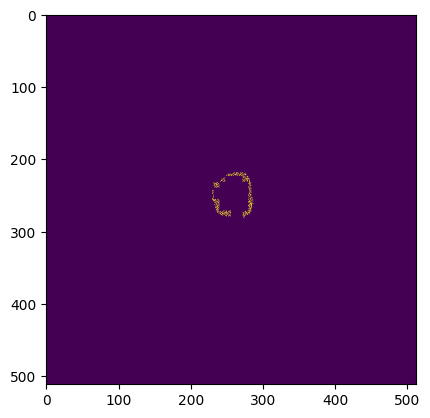

In [ ]:
mask_img[np.where(mask_img==255)] = 0
plt.imshow(mask_img)

In [ ]:
shape_analyze = {'shapes' : []}
for image in df_train.iterrows():
    current_img = Image.open(image[1]['mask_path'])
    current_img = np.array(current_img)
    shape_analyze['shapes'].append(current_img.shape)

shape_analyze = pd.DataFrame(shape_analyze)
shape_analyze.value_counts()

shapes      
(512, 512)      3010
(256, 256)        24
(225, 225)         8
(442, 442)         3
(251, 201)         2
                ... 
(690, 722)         1
(900, 940)         1
(903, 721)         1
(1280, 1280)       1
(1427, 1275)       1
Name: count, Length: 98, dtype: int64

In [ ]:
shape_analyze['channel'] = shape_analyze['shapes'].apply(lambda x : x[2] if len(x) == 3 else 0)
shape_analyze['channel'].value_counts()

channel
0    3146
Name: count, dtype: int64

# Calculate weight tumor pixels over background pixels

In [ ]:
import torch
def find_weight(df = df_train):
    tumor_pix = 0
    total_pix = 0
    for image in df_train.iterrows():
        current_img = Image.open(image[1]['mask_path'])
        current_img = np.array(current_img)
        current_img = np.where(current_img > threshold_mask, 1, 0)
        tumor_pix += current_img.sum()
        total_pix += current_img.shape[0] * current_img.shape[1]

    return tumor_pix / total_pix

weight = find_weight()
pos_weight = 1.0 / weight
pos_weight = torch.tensor(pos_weight, dtype=torch.float32)
print(pos_weight)

tensor(62.9549)


# Preprocessing

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import cv2 as cv
import numpy as np

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
class SWIN_HAF_dataset(Dataset):
    def __init__(self, df, threshold=225, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform # Augmentation defines later
        self.threshold = threshold
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = cv.imread(self.df.iloc[idx]['image_path'], cv.COLOR_BGR2RGB)
        mask = cv.imread(self.df.iloc[idx]['mask_path'], cv.IMREAD_GRAYSCALE)

        mask = np.where(mask>self.threshold, 1, 0)
        mask = mask.astype(np.uint8)

        image = cv.resize(image, (512,512), interpolation=cv.INTER_LINEAR)
        mask = cv.resize(mask, (512, 512), interpolation=cv.INTER_NEAREST)

        if len(image.shape) ==2:
            image = np.stack([image]*3, axis=0)
        else:
            image = np.transpose(image, (2,0,1))
        image = image / 255.0
        if self.transform:
            image = self.transform(image)
        return torch.tensor(image, device=DEVICE), torch.tensor(mask, device=DEVICE).unsqueeze(0)

In [ ]:
swin_ds_train = SWIN_HAF_dataset(df_train, threshold=threshold_mask)
swin_ds_val = SWIN_HAF_dataset(df_val, threshold=threshold_mask)
swin_ds_test = SWIN_HAF_dataset(df_test, threshold=threshold_mask)

# Utilities function

In [ ]:
import torch
import torch.nn.functional as F
from torchmetrics.segmentation import DiceScore
from torchmetrics.classification import BinaryJaccardIndex
def dice_loss(logits, targets, threshold=0.5, smooth=1e-6):
    """
    logits: Model output tensor (batch_size, 2, H, W) - raw logits for 2 classes (background and tumor)
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask (tumor=1, background=0)
    """
    if isinstance(logits, dict):
      logits = logits['logits']
    # Convert logits to probabilities using softmax
    probs = torch.softmax(logits, dim=1)  # (batch_size, 2, H, W)
    # Extract tumor predictions from second channel
    probs = probs[:, 1:2, ...]  # (batch_size, 1, H, W)
    preds = torch.where(probs >= threshold, 1, 0).int()
    targets = targets.int()
    # Calculate Dice Score using torchmetrics
    # dice = DiceScore(num_classes=2, average='weighted', input_format='one-hot')(preds, targets)
    # calculate Dice Score
    dice = (2 * (preds * targets) + smooth).sum() / ((preds + targets) + smooth).sum()
    return 1 - dice

def binary_cross_entropy_loss(logits, targets):
    """
    logits: Model output tensor (batch_size, 2, H, W) - raw logits for 2 classes
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask
    """
    if isinstance(logits, dict):
      logits = logits['logits']
    # Convert logits to probabilities using softmax
    # probs = torch.softmax(logits, dim=1)  # (batch_size, 2, H, W)
    bce_loss = torch.nn.BCEWithLogitsLoss().to(DEVICE)
    # preds = probs[:, 1:2, :, :].float()  # Extract tumor channel (batch_size, 1, H, W)
    targets = targets.float()
    return bce_loss(logits[:, 1:2, :, :].float(), targets)

def total_loss(logits, targets, smooth=1e-6, dice_weight=1.0, bce_weight=0.5):
    """
    logits: Model output tensor (batch_size, 2, H, W) - raw logits
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask
    """
    if isinstance(logits, dict):
      logits = logits['logits']
    dice = dice_loss(logits, targets, smooth)
    bce = binary_cross_entropy_loss(logits, targets)
    return dice_weight * dice + bce_weight * bce

def pixel_accuracy(logits, targets, threshold=0.5):
    """
    logits: Model output tensor (batch_size, 2, H, W) - raw logits for 2 classes
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask
    """
    if isinstance(logits, dict):
      logits = logits['logits']
    # Convert logits to probabilities using softmax
    probs = torch.softmax(logits, dim=1)  # (batch_size, 2, H, W)
    preds = (probs[:, 1:2, :, :] >= threshold).int()  # (batch_size, 1, H, W)
    correct = (preds == targets).float()
    accuracy = correct.sum() / correct.numel()
    return accuracy

def jaccard_index(logits, targets, threshold=0.5, smooth=1e-6, device=DEVICE):
    """
    logits: Model output tensor (batch_size, 2, H, W) - raw logits for 2 classes
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask
    """
    if isinstance(logits, dict):
      logits = logits['out']
    # Convert logits to probabilities using softmax
    probs = torch.softmax(logits, dim=1)  # (batch_size, 2, H, W)
    preds = (probs[:, 1:2, :, :] >= threshold).int()  # (batch_size, 1, H, W)
    targets = targets.int()
    jaccard = BinaryJaccardIndex().to(device=device)(preds, targets)
    return jaccard


def sensitivity(logits, targets, threshold=0.5, smooth=1e-6):
    """
    Also known as Recall or True Positive Rate
    Sensitivity = True Positives / (True Positives + False Negatives)
    logits: Model output tensor (batch_size, 2, H, W) - raw logits for 2 classes
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask
    """
    if isinstance(logits, dict):
      logits = logits['logits']
    # Convert logits to probabilities using softmax
    probs = torch.softmax(logits, dim=1)  # (batch_size, 2, H, W)
    preds = (probs[:, 1:2, :, :] >= threshold).float()  # (batch_size, 1, H, W)
    targets = targets.float()

    true_positives = (preds * targets).sum()
    possible_positives = targets.sum()

    sens = (true_positives + smooth) / (possible_positives + smooth)
    return sens

def specificity(logits, targets, threshold=0.5, smooth=1e-6):
    """
    Also known as True Negative Rate
    Specificity = True Negatives / (True Negatives + False Positives)
    Specificity = True Negatives / (True Negatives + False Positives)
    logits: Model output tensor (batch_size, 2, H, W) - raw logits for 2 classes
    targets: Ground truth tensor (batch_size, 1, H, W) for binary mask
    """
    if isinstance(logits, dict):
      logits = logits['logits']
    # Convert logits to probabilities using softmax
    probs = torch.softmax(logits, dim=1)  # (batch_size, 2, H, W)
    preds = (probs[:, 1:2, :, :] >= threshold).float()  # (batch_size, 1, H, W)
    targets = targets.float()

    true_negatives = ((1 - preds) * (1 - targets)).sum()
    possible_negatives = (1 - targets).sum()

    spec = (true_negatives + smooth) / (possible_negatives + smooth)
    return spec

def evaluate(model, dataloader, device):
    """
    Evaluate model on validation/test data
    images: (batch_size, 3, H, W)
    masks: (batch_size, 1, H, W)
    model output: (batch_size, 2, H, W) - logits
    """
    model.eval()
    total_loss_value = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)

            logits = model(images)  # (batch_size, 2, H, W) - raw logits
            loss = total_loss(logits, masks).item()

            total_loss_value += loss * images.size(0)
            total_samples += images.size(0)

    avg_loss = total_loss_value / total_samples

    return avg_loss

def validate(model, dataloader, device):
    model.eval()
    total_jaccard = 0.0
    total_pixel_acc = 0.0
    total_sensitivity = 0.0
    total_specificity = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)

            logits = model(images)  # (batch_size, 2, H, W) - raw logits

            batch_size = images.size(0)
            total_jaccard += jaccard_index(logits, masks).item() * batch_size
            total_pixel_acc += pixel_accuracy(logits, masks).item() * batch_size
            total_sensitivity += sensitivity(logits, masks).item() * batch_size
            total_specificity += specificity(logits, masks).item() * batch_size
            total_samples += batch_size

    avg_jaccard = total_jaccard / total_samples
    avg_pixel_acc = total_pixel_acc / total_samples
    avg_sensitivity = total_sensitivity / total_samples
    avg_specificity = total_specificity / total_samples

    return {
        "jaccard": avg_jaccard,
        "pixel_accuracy": avg_pixel_acc,
        "sensitivity": avg_sensitivity,
        "specificity": avg_specificity
    }

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_test(trainer, df_test):
  images_selected = df_test.sample(BATCH_SIZE, random_state=36)

  test_ds = SWIN_HAF_dataset(images_selected, threshold=245)
  output = trainer.predict(test_ds)

  # Get predictions, labels, and loss from the output of trainer.predict
  predictions = output.predictions
  if isinstance(predictions, dict):
    predictions = predictions['logits']
  labels = output.label_ids

  # Convert predictions to binary masks using a threshold (e.g., 0.5 after sigmoid or softmax)
  # Assuming the model output is logits for 2 classes (background, tumor)
  # We take the second channel (tumor) and apply a threshold after softmax
  predicted_masks = torch.softmax(torch.tensor(predictions), dim=1)[:, 1, :, :] # Get tumor probabilities
  predicted_masks = (predicted_masks > 0.5).int() # Apply threshold

  # Convert labels (ground truth masks) to tensors
  ground_truth_masks = torch.tensor(labels).int().squeeze(1) # Remove the channel dimension

  # Display a few examples
  num_examples_to_show = min(BATCH_SIZE, len(test_ds))

  fig, axes = plt.subplots(num_examples_to_show, 3, figsize=(15, 5 * num_examples_to_show))

  for i in range(num_examples_to_show):
      # Original Image (need to get it from the dataset)
      original_image, _ = test_ds[i]
      original_image = original_image.permute(1, 2, 0).cpu().numpy() # Convert to HWC format for plotting

      # Ground Truth Mask
      ground_truth_mask = ground_truth_masks[i].cpu().numpy()

      # Predicted Mask
      predicted_mask = predicted_masks[i].cpu().numpy()

      # Plotting
      axes[i, 0].imshow(original_image)
      axes[i, 0].set_title("Original Image")
      axes[i, 0].axis('off')

      axes[i, 1].imshow(ground_truth_mask, cmap='gray')
      axes[i, 1].set_title("Ground Truth Mask")
      axes[i, 1].axis('off')

      axes[i, 2].imshow(predicted_mask, cmap='gray')
      axes[i, 2].set_title("Predicted Mask")
      axes[i, 2].axis('off')

  plt.tight_layout()
  plt.show()

# Build model

In [ ]:
WANDB_API_KEY = '689dcaaa61778986c33491959d20dc4c16ef3511'

## Basic CNN

## U-net

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Test set evaluation results: {'eval_loss': 0.970227062702179, 'eval_jaccard': 0.7527247667312622, 'eval_pixel_accuracy': 0.9948533773422241, 'eval_sensitivity': 0.8223535418510437, 'eval_specificity': 0.9982035756111145, 'eval_dice_score': 0.8589234352111816, 'eval_runtime': 10.8317, 'eval_samples_per_second': 79.396, 'eval_steps_per_second': 9.971, 'epoch': 30.0}


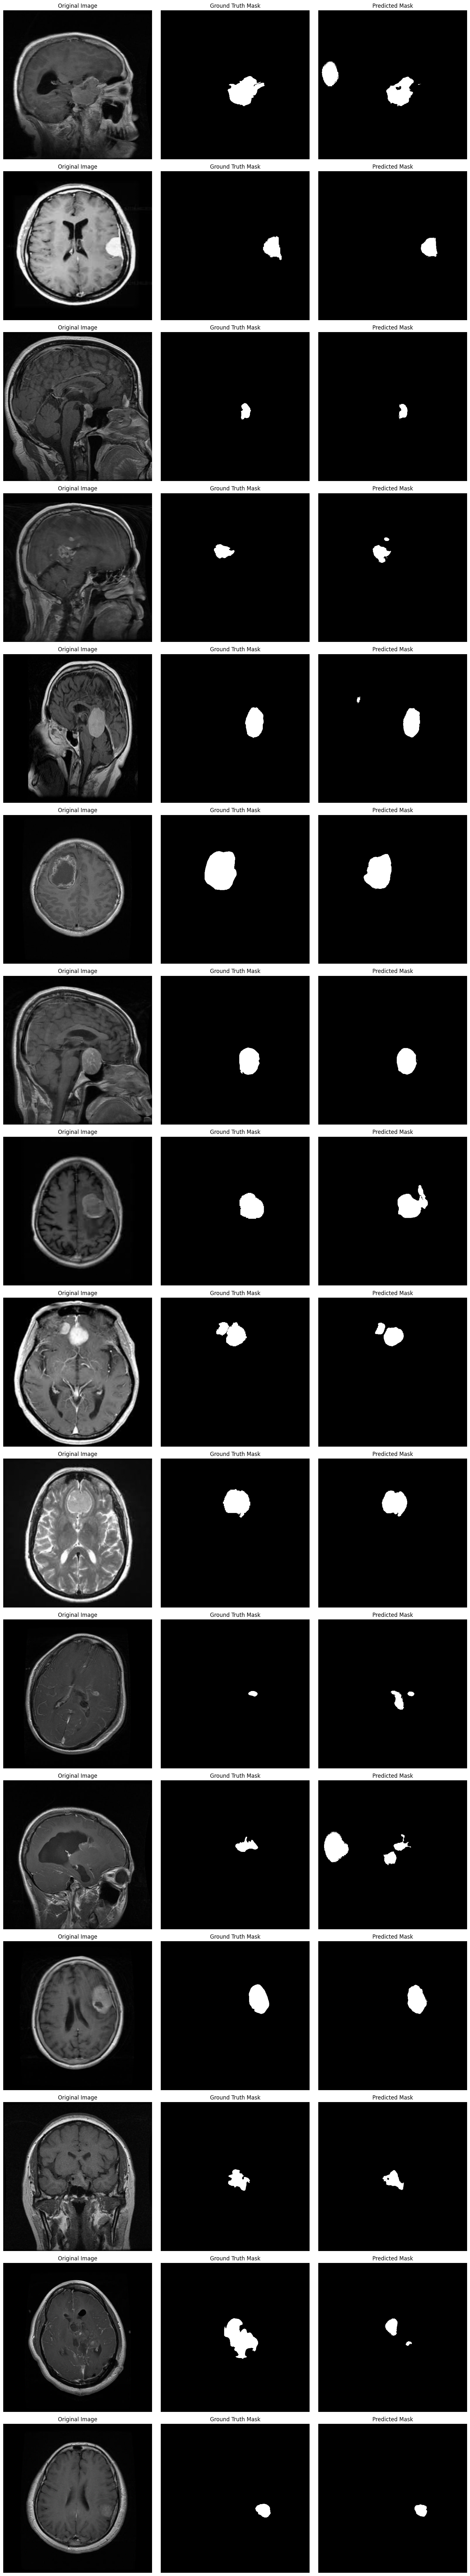

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from transformers.data.data_collator import default_data_collator
from collections.abc import Mapping
import torch
import segmentation_models_pytorch as smp
import wandb

EPOCHS = 30
LEARNING_RATE = 1.5e-4
BATCH_SIZE = 16
WARMUP_STEPS = 500 # 10% of num_steps
WEIGHT_DECAY = 0.01
LOGGING_DIR_UNET = './logs_unet'
LOGGING_DIR_SWIN = './logs_swin'
LOGGING_STEPS = 100
import os
os.makedirs(LOGGING_DIR_UNET, exist_ok=True)
os.makedirs(LOGGING_DIR_SWIN, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=BATCH_SIZE):
        # inputs here will be a list of tensors from the custom data collator
        # We need to stack them to form a batch
        # Get the device from the model's parameters
        device = next(model.parameters()).device
        images = inputs['pixel_values'].to(device).float()  # Explicitly cast to float
        masks = inputs['labels'].to(device).float()  # Explicitly cast to float

        outputs = model(images)
        loss = total_loss(outputs, masks)
        return (loss, outputs) if return_outputs else loss

    # Add prediction_step method to handle the input format
    def prediction_step(self, model, inputs, prediction_loss_only, ignore_keys=None):
        device = next(model.parameters()).device
        images = inputs['pixel_values'].to(device).float()
        masks = inputs['labels'].to(device).float()

        with torch.no_grad():
            outputs = model(images)
            loss = total_loss(outputs, masks)

        # Return loss, logits, and labels
        return (loss, outputs, masks)

    # Override on_train_begin to prevent accessing model.config.to_json_string()
    def on_train_begin(self, args, state, control):

        return control


class CustomDataCollator:
    def __call__(self, features):
        # features is a list of samples from the dataset, where each sample is a tuple of tensors (image, mask)
        # Stack the images and masks and return them as a dictionary
        images = torch.stack([f[0] for f in features])
        masks = torch.stack([f[1] for f in features])
        return {"pixel_values": images, "labels": masks}


train_args_unet = TrainingArguments(
    output_dir="./unet_output",
    dataloader_pin_memory=False,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE//2,
    learning_rate=LEARNING_RATE,
    warmup_steps=WARMUP_STEPS,
    weight_decay=WEIGHT_DECAY,
    logging_dir=LOGGING_DIR_UNET,
    logging_steps=LOGGING_STEPS,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    remove_unused_columns=False,
    report_to="wandb",  # Disable all logging integrations including TensorBoard
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Ensure predictions and labels are on the same device as the metrics
    if isinstance(logits, dict):
        logits = logits['logits']
    logits = torch.tensor(logits).to(DEVICE)
    labels = torch.tensor(labels).to(DEVICE)

    # Calculate metrics using the provided functions
    jaccard = jaccard_index(logits, labels).item()
    pixel_acc = pixel_accuracy(logits, labels).item()
    sens = sensitivity(logits, labels).item()
    spec = specificity(logits, labels).item()
    dice = 1 - dice_loss(logits, labels).item()


    return {
        "jaccard": jaccard,
        "pixel_accuracy": pixel_acc,
        "sensitivity": sens,
        "specificity": spec,
        "dice_score": dice
    }

import torch.nn as nn
from transformers import PretrainedConfig, PreTrainedModel
import json

# Create a wrapper class that inherits from PreTrainedModel
class UNetWrapper(PreTrainedModel):
    def __init__(self, encoder_name="efficientnet-b0", in_channels=3, classes=2):
        # Initialize with a config
        config = UNetConfig(
            encoder_name=encoder_name,
            in_channels=in_channels,
            classes=classes
        )
        super().__init__(config)

        # Create the actual U-Net model
        self.unet = smp.Unet(
            encoder_name=encoder_name,
            encoder_weights="imagenet",
            # encoder_weights=None,
            in_channels=in_channels,
            classes=classes,
            aux_params=None  # Ensure no auxiliary outputs
        )

    def forward(self, pixel_values, labels=None):
        outputs = self.unet(pixel_values)

        if labels is not None:
            # Calculate loss if labels are provided
            loss = total_loss(outputs, labels)
            return {"loss": loss, "logits": outputs}

        return {"logits": outputs}

# Config class
class UNetConfig(PretrainedConfig):
    model_type = "unet"

    def __init__(self, encoder_name="efficientnet-b0", in_channels=3, classes=2, **kwargs):
        self.encoder_name = encoder_name
        self.in_channels = in_channels
        self.classes = classes
        super().__init__(**kwargs)

# Use the wrapped model
unet_model = UNetWrapper(
    encoder_name="efficientnet-b0",
    in_channels=3,
    classes=2,

).to(device=DEVICE, dtype=torch.float32)

unet_trainer = CustomTrainer(
    model=unet_model,
    args=train_args_unet,
    train_dataset=swin_ds_train, # Use the dataset directly, not the DataLoader
    eval_dataset=swin_ds_val,   # Use the dataset directly, not the DataLoader
    compute_metrics=compute_metrics,
    data_collator=CustomDataCollator(), # Pass the custom data collator
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

unet_trainer.train()

eval_result = unet_trainer.evaluate(eval_dataset=swin_ds_test) # Use the dataset directly, not the DataLoader
print(f"Test set evaluation results: {eval_result}")

plot_test(unet_trainer, df_test)
wandb.finish()
# Save the trained model
torch.save(unet_model.state_dict(), "unet_model.pth")

## SWIN-HAFNet

### Constants

In [ ]:
EMBEDDING_DIM = 96
DEPTHS = [2, 2, 2]
NUM_HEADS = [3, 6, 12]
WINDOW_SIZE = 7
MLP_RATIO = 4.0
QKV_BIAS = True
DROP_RATE = 0.0
ATTN_DROP_RATE = 0.0
DROP_PATH_RATE = 0.1
PATCH_SIZE = 4
INPUT_SIZE = 512 # Changed INPUT_SIZE to 256 to match dataset resizing
CHANNELS = 3
SCALE_FACTOR = 2
SHIFT_SIZE = WINDOW_SIZE // 2
NUM_CLASSES = 2
TOKEN_EMBEDDING_DIM = 768*4

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.ops.deform_conv import deform_conv2d
from timm.models.swin_transformer import SwinTransformerBlock
from typing import Tuple, Optional
import math # Import math for trunc_normal_
import scipy.stats as stats
from timm.layers import DropPath
from einops import rearrange
# Helper function for weight initialization (from the reference)
def trunc_normal_(tensor, mean=0., std=1., a=-2., b=2.):
  # tensor: A torch.Tensor, typically weights of layer
    # From https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/layers/weight_init.py
    # def norm_cdf(x): # Cummulative normal distribution
    #     return (1. + math.erf((x - mu) / (std * math.sqrt(2.)))) / 2.

    if (mean < a - 2 * std) or (mean > b + 2 * std):
        warnings.warn("mean is more than 2 std from [a, b] bounds",
                      stacklevel=2)
    with torch.no_grad():
        # Values are generated by truncated normal distribution
        l = stats.norm.cdf(a, loc=mean, scale=std)
        u = stats.norm.cdf(b, loc=mean, scale=std)
        tensor.uniform_(2 * l - 1, 2 * u - 1)
        tensor.erfinv_()
        tensor.mul_(std * math.sqrt(2.))
        tensor.add_(mean)
        tensor.clamp_(min=a, max=b)
        return tensor

# Helper class for Depthwise Convolution (from the reference, assuming it exists or is needed)
class DWConv(nn.Module):
    def __init__(self, dim=768):
        super(DWConv, self).__init__()
        self.dwconv = nn.Conv2d(dim, dim, 3, 1, 1, bias=True, groups=dim)

    def forward(self, x, H, W):
        B, N, C = x.shape
        x = x.transpose(1, 2).view(B, C, H, W)
        x = self.dwconv(x)
        x = x.flatten(2).transpose(1, 2)
        return x

#-------------------Encoder Blocks-------------------#
class PatchPartition(nn.Module):
    """
    Input shape: (B, C, H, W)
    Output shape: (B, C*patch_size*patch_size, H/patch_size, W/patch_size)
    E.g. 4x downsampling if patch_size=4
    """
    def __init__(self, patch_size=4):
        super(PatchPartition, self).__init__()
        self.patch_size = patch_size

    def forward(self, x):
        """
        x: (B, C, H, W)
        """
        B, C, H, W = x.shape
        assert H % self.patch_size == 0 and W % self.patch_size == 0, "H and W must be divisible by patch_size."

        x = x.view(B, C, H // self.patch_size, self.patch_size, W // self.patch_size, self.patch_size)
        x = x.permute(0, 2, 4, 1, 3, 5).contiguous()  # (B, H/ps, W/ps, C, ps, ps)
        x = x.view(B, H // self.patch_size, W // self.patch_size, -1)  # (B, H/ps, W/ps, C*ps*ps)
        return x

class LinearEmbed(nn.Module):
    """
    Linear Embedding layer that flattens the patch partition to a linear embedding.
    Input shape: (B, H/patch_size, W/patch_size, C * patch_size * patch_size)
    Output shape: (B, embed_dim, H/patch_size, W/patch_size)
    """
    def __init__(self, in_channels=CHANNELS * PATCH_SIZE * PATCH_SIZE, embed_dim=EMBEDDING_DIM, norm_layer=nn.LayerNorm):
        super().__init__()
        self.proj = nn.Linear(in_channels, embed_dim)
        self.norm = norm_layer(embed_dim) if norm_layer is not None else nn.Identity()

    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (B, H, W, C * patch_size * patch_size)
        Returns:
            x: Embedded tensor of shape (B, embed_dim, H, W)
        """
        x = self.proj(x)  # (B, H, W, embed_dim)
        x = self.norm(x)  # (B, H, W, embed_dim)
        x = x.permute(0, 3, 1, 2).contiguous()  # (B, embed_dim, H, W)
        return x

# Swin Transformer Block is imported from timm, so no need to redefine it here.

class PatchMerging(nn.Module):
    """
    Patch Merging Layer that downsamples the input feature map.
    Input shape: (B, C, H, W)
    Output shape: (B, 2*C, H/2, W/2)
    """
    def __init__(self, dim):
        super(PatchMerging, self).__init__()
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = nn.LayerNorm(4 * dim)
    def forward(self, x):
        """
        x: (B, C, H, W)
        """
        B, C, H, W = x.shape
        assert H % 2 == 0 and W % 2 == 0, "H and W must be even."

        # Convert to (B, H, W, C) for patch merging operations
        x = x.permute(0, 2, 3, 1).contiguous()  # (B, H, W, C)

        x0 = x[:, 0::2, 0::2, :]  # (B, H/2, W/2, C)
        x1 = x[:, 1::2, 0::2, :]  # (B, H/2, W/2, C)
        x2 = x[:, 0::2, 1::2, :]  # (B, H/2, W/2, C)
        x3 = x[:, 1::2, 1::2, :]  # (B, H/2, W/2, C)

        x = torch.cat([x0, x1, x2, x3], dim=-1)  # (B, H/2, W/2, 4*C)
        x = self.norm(x) # (B, H/2, W/2, 4*C)
        x = self.reduction(x) # (B, H/2, W/2, 2*C)
        x = x.permute(0, 3, 1, 2).contiguous()  # (B, 2*C, H/2, W/2)
        return x

class Encoder(nn.Module):
    """
    Encoder pathway
    Input shape: (B, 3, H, W)
    Output shape: (B, H/32*W/32, 768) if input_size=512 and patch_size=4
    Also outputs three intermediate features for skip connections:
    to_haf_1: (B, 96, H/4, W/4)
    to_haf_2: (B, 192, H/8, W/8)
    to_haf_3: (B, 384, H/16, W/16)

    Workflow of encoder:
    (B, 3, H, W) - Patch partition-> (B, H/4, W/4, 48) - Linear embed -> (B, 96, H/4, W/4)
        -> Swin blocks (x2) -> (B, 96, H/4, W/4) -> to_haf_1
        -> Patch Merging -> (B, 192, H/8, W/8)
        -> Swin blocks (x2) -> (B, 192, H/8, W/8) -> to_haf_2
        -> Patch Merging -> (B, 384, H/16, W/16)
        -> Swin blocks (x2) -> (B, 384, H/16, W/16) -> to_haf_3
        -> Patch Merging -> (B, 768, H/32, W/32)
        -> Swin blocks (x2) -> (B, 768, H/32, W/32)

    Finally, flatten the spatial dimensions for next stage.
    Result shape: (B, 768, H/32*W/32) -
    -> 32x downsampling if input_size=512 and patch_size=4
    """
    def __init__(self, in_channels=CHANNELS, embed_dim=EMBEDDING_DIM, depths=DEPTHS, num_heads=NUM_HEADS, patch_size=PATCH_SIZE, input_size=INPUT_SIZE):
        super(Encoder, self).__init__()
        self.patch_partition = PatchPartition(patch_size=patch_size)
        self.linear_embed = LinearEmbed(in_channels * patch_size * patch_size, embed_dim)
        # There are 3 variables to hold the outputs for skip connections (will go to HAF blocks after each stage)
        self.to_haf_1 = None
        self.to_haf_2 = None
        self.to_haf_3 = None
        # Calculate resolution after patch partition
        current_resolution = input_size // patch_size  # 512 // 4 = 128
        self.layers = nn.ModuleList()

        for i in range(len(depths)):
            layer = nn.ModuleList()
            for j in range(depths[i]):
                block = SwinTransformerBlock(
                    dim=embed_dim * (2 ** i),
                    input_resolution=(current_resolution, current_resolution),  # Use actual resolution
                    num_heads=num_heads[i],
                    window_size=WINDOW_SIZE,
                    shift_size=0 if (j % 2 == 0) else WINDOW_SIZE // 2,
                    mlp_ratio=MLP_RATIO,
                    qkv_bias=QKV_BIAS,
                    attn_drop=ATTN_DROP_RATE,
                    drop_path=DROP_PATH_RATE,
                    norm_layer=nn.LayerNorm
                )
                layer.append(block)
            self.layers.append(layer)

            self.layers.append(PatchMerging(embed_dim * (2 ** i)))
            current_resolution = current_resolution // 2  # Resolution halves after patch merging

    def forward(self, x):
        # Assume that patch_size == 4
        x = self.patch_partition(x)  # (B, H/4, W/4, 48) - note: still (B, H, W, C) from patch partition
        x = self.linear_embed(x)  # (B, 96, H/4, W/4) - converted to channel-first

        for layer in self.layers:
            if isinstance(layer, nn.ModuleList):
                # Convert to (B, H, W, C) for Swin Transformer blocks
                B, C, H, W = x.shape
                x_swin = x.permute(0, 2, 3, 1).contiguous()  # (B, H, W, C) - convert for Swin blocks

                # Process Swin Transformer blocks
                for block in layer:
                    x_swin = block(x_swin)  # (B, H, W, C)

                # Convert back to channel-first
                x = x_swin.permute(0, 3, 1, 2).contiguous()  # (B, C, H, W) - back to channel-first

                if C == EMBEDDING_DIM:  # 96 channels
                    self.to_haf_1 = x  # (B, 96, H/4, W/4)
                elif C == EMBEDDING_DIM * 2:  # 192 channels
                    self.to_haf_2 = x  # (B, 192, H/8, W/8)
                elif C == EMBEDDING_DIM * 4:  # 384 channels
                    self.to_haf_3 = x  # (B, 384, H/16, W/16)

            else:
                # Process PatchMerging layer (expects (B, C, H, W))
                x = layer(x)  # (B, 2*C, H/2, W/2)

        # Flatten spatial dimensions for CBE
        B, C, H, W = x.shape  # (B, 768, H/32, W/32)
        x = x.view(B, C, -1)  # (B, 768, H/32*W/32)
        return x


#-------------------Skip Connection Blocks-------------------#
class HAF(nn.Module):
    """
    Hierarchical Attention Fusion (HAF) Block
    Input shape: x_decoder: (B, C, H, W);
                x_skip: (B, C, H, W)
    Output shape: (B, C, H, W)
    x_decoder -> swin transformer block
                    |
    x_skip ------> cat --> (B, 2C, H, W) --> conv 1x1 -> result
    """
    def __init__(self, dim, input_resolution : Tuple[int, int], num_heads=NUM_HEADS, embedding_dim=EMBEDDING_DIM):
        # dim is C in the docstring
        # resolution is (H, W)
        super(HAF, self).__init__()
        self.swin_block = None
        for i in range(2):
            self.swin_block = SwinTransformerBlock(
                dim=dim,
                input_resolution=input_resolution,
                num_heads=num_heads[0] if dim == embedding_dim else num_heads[1] if dim == embedding_dim * SCALE_FACTOR else num_heads[2],
                window_size=WINDOW_SIZE,
                shift_size=0 if (i % 2 == 0) else WINDOW_SIZE // 2,
                mlp_ratio=MLP_RATIO,
                qkv_bias=QKV_BIAS,
                attn_drop=ATTN_DROP_RATE,
                drop_path=DROP_PATH_RATE,
                norm_layer=nn.LayerNorm
            )
        self.conv1x1 = nn.Conv2d(2 * dim, dim, kernel_size=1, bias=False)

    def forward(self, x_decoder, x_skip):
        # Convert to (B, H, W, C) for SwinTransformerBlock
        x_decoder_swin = x_decoder.permute(0, 2, 3, 1).contiguous()  # (B, C, H, W) -> (B, H, W, C)
        x_skip_swin = x_skip.permute(0, 2, 3, 1).contiguous()  # (B, C, H, W) -> (B, H, W, C)

        x = self.swin_block(x_decoder_swin)  # (B, H, W, C) - Swin block output
        x = torch.cat([x, x_skip_swin], dim=-1)  # (B, H, W, 2C) - concatenate along channel dim
        x = x.permute(0, 3, 1, 2).contiguous()  # (B, H, W, 2C) -> (B, 2C, H, W)
        x = (self.conv1x1(x))  # (B, 2C, H, W) -> (B, C, H, W)
        return x


#-------------------Decoder Blocks-------------------#


class PatchExpanding(nn.Module):
    """
    Patch Expanding Layer that upsamples the input feature map using deconvolution.
    Input shape: (B, C, H, W)
    Output shape: (B, C/2, 2*H, 2*W)
    """
    def __init__(self, dim, dim_scale=SCALE_FACTOR):
        super(PatchExpanding, self).__init__()
        self.dim = dim
        self.dim_scale = dim_scale
        # Deconvolution layer: upsamples by 2x and reduces channels by half
        # self.deconv = nn.ConvTranspose2d(
        #     in_channels=dim,
        #     out_channels=dim // dim_scale,
        #     kernel_size=4,
        #     stride=2,
        #     padding=1,
        #     bias=False
        # )
        self.linear_layer = nn.Linear(dim, dim * dim_scale)
        self.norm = nn.LayerNorm(dim * dim_scale)
        # GroupNorm works better with channel-first format
        # self.norm = nn.GroupNorm(1, dim // dim_scale)

    def forward(self, x):
        """
        x: (B, C, H, W)
        """
        # x = self.deconv(x)  # (B, C, H, W) -> (B, C/2, 2*H, 2*W)
        x = x.permute(0, 2, 3, 1).contiguous()  # (B, C, H, W) -> (B, H, W, C)
        x = self.linear_layer(x) # (B, H, W, C) -> (B, H, W, C * dim_scale)
        x = self.norm(x)    # Normalize the upsampled features
        x = x.permute(0, 3, 1, 2).contiguous()  # (B, H, W, C*dim_scale) -> (B, C*dim_scale, H, W)
        x = rearrange(x, 'b (c h1 w1) h w -> b c (h h1) (w w1)', h1=self.dim_scale, w1=self.dim_scale)  # (B, C*dim_scale, H, W) -> (B, C/dim_scale,H * dim_scale, W * dim_scale)
        return x

class ACA(nn.Module):
    """
    Adaptive Contextual Aggregator (ACA) Block
    Input shape: (B, C, H, W)
    Output shape: (B, C, H, W)

    Workflow:
            --> Swin Transformer Block      |
            |
    (B, C, H, W) ->                      -->cat (B, 3C, H, W) --> conv 1 x 1 -> (B, C, H, W)
            | --> DeformableConv2d          |

    """
    def __init__(self, dim, input_resolution : Tuple[int, int], depth=2, num_heads=NUM_HEADS, embedding_dim=EMBEDDING_DIM):
        super(ACA, self).__init__()
        self.swin_layers = nn.ModuleList()
        for i in range(depth):
            swin_block = SwinTransformerBlock(
                dim=dim,
                input_resolution=input_resolution,
                num_heads=num_heads[0] if dim == embedding_dim else num_heads[1] if dim == embedding_dim * SCALE_FACTOR else num_heads[2],
                window_size=WINDOW_SIZE,
                shift_size=0 if (i % 2 == 0) else WINDOW_SIZE // 2,
                mlp_ratio=MLP_RATIO,
                qkv_bias=QKV_BIAS,
                attn_drop=ATTN_DROP_RATE,
                drop_path=DROP_PATH_RATE,
                norm_layer=nn.LayerNorm
            )
            self.swin_layers.append(swin_block)
        self.conv1x1 = nn.Conv2d(3 * dim, dim, kernel_size=1, bias=False)

    def forward(self, x_decoder, deform_group=1, deform_kernel_size=3):
        B, C, H, W = x_decoder.shape  # Input: (B, C, H, W)

        # Convert to (B, H, W, C) for SwinTransformerBlock
        x_decoder_swin = x_decoder.permute(0, 2, 3, 1).contiguous()  # (B, C, H, W) -> (B, H, W, C)

        x_swin = x_decoder_swin
        for layer in self.swin_layers:
            x_swin = layer(x_swin)  # (B, H, W, C) - Swin transformer processing

        # Deformable convolution (already in channel-first format)
        x_deform = deform_conv2d(input=x_decoder,  # Input: (B, C, H, W)
                                 offset=torch.zeros(B, 2*deform_group*deform_kernel_size*deform_kernel_size, H, W, device=x_decoder.device),
                                 weight=torch.ones(C, C // deform_group , deform_kernel_size, deform_kernel_size, device=x_decoder.device) / (deform_kernel_size*deform_kernel_size),
                                 padding=(deform_kernel_size//2, deform_kernel_size//2),)  # Output: (B, C, H, W)

        # Convert swin output to channel-first for concatenation
        x_swin = x_swin.permute(0, 3, 1, 2).contiguous()  # (B, H, W, C) -> (B, C, H, W)

        x = torch.cat([x_decoder, x_swin, x_deform], dim=1)  # (B, C, H, W) + (B, C, H, W) + (B, C, H, W) -> (B, 3C, H, W)
        x = (self.conv1x1(x))  # (B, 3C, H, W) -> (B, C, H, W)
        return x


class Decoder (nn.Module):
    """
    Decoder pathway
    Input shape: (B, 768, H/32 * W/32) if input_size=512, patch_size=4 and embedding_dim=96
    Output shape: (B, 48, H/2, W/2) if input_size=512, patch_size=4 and embedding_dim=96
    """
    def __init__(self, in_channels=SCALE_FACTOR**(len(DEPTHS))*EMBEDDING_DIM, depths=DEPTHS, input_size=INPUT_SIZE, patch_size=PATCH_SIZE, embedding_dim=EMBEDDING_DIM):
        """
        in_channels: channels of the input feature map (from encoder)
        """
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList()
        self.to_haf_1 = None
        self.to_haf_2 = None
        self.to_haf_3 = None
        self.haf_1 = HAF(dim=embedding_dim,
                            input_resolution=(input_size // (patch_size), input_size // (patch_size)),
                            embedding_dim=embedding_dim)
        self.haf_2 = HAF(dim=embedding_dim * SCALE_FACTOR,
                            input_resolution=(input_size // (patch_size * SCALE_FACTOR), input_size // (patch_size * SCALE_FACTOR)),
                            embedding_dim=embedding_dim)
        self.haf_3 = HAF(dim=embedding_dim * SCALE_FACTOR**2,
                            input_resolution=(input_size // (patch_size * SCALE_FACTOR**2), input_size // (patch_size * SCALE_FACTOR**2)),
                            embedding_dim=embedding_dim)
        current_resolution =  input_size // (patch_size * (SCALE_FACTOR ** len(DEPTHS)))  # Starting resolution
        for depth in depths:
            self.layers.append(PatchExpanding(in_channels))
            in_channels //= 2  # Halve the channels after each upsampling
            current_resolution *= 2  # Double the resolution after each upsampling

            layer = nn.ModuleList()
            layer.append(ACA(in_channels, input_resolution=(current_resolution, current_resolution)))
            self.layers.append(layer)

        self.layers.append(PatchExpanding(in_channels))


    def forward(self, x, x_encode_haf_1, x_encode_haf_2, x_encode_haf_3):
        # x: (B, 768, H*W) - channel-first flattened from CBE
        B, C, HW = x.shape
        H = W = int(HW ** 0.5)  # H=W=16 for 512x512 input with 32x downsampling
        x = x.view(B, C, H, W)  # (B, 768, H*W) -> (B, 768, H/32, W/32)

        for layer in self.layers:
            if isinstance(layer, nn.ModuleList):
                # Process ACA blocks
                for block in layer:
                    B, C, H, W = x.shape
                    x = block(x)  # (B, C, H, W) - ACA processing
                if C == EMBEDDING_DIM * (SCALE_FACTOR ** 2):  # 384 channels
                    self.to_haf_3 = self.haf_3(x, x_encode_haf_3)  # (B, 384, H/16, W/16)
                elif C == EMBEDDING_DIM * SCALE_FACTOR:  # 192 channels
                    self.to_haf_2 = self.haf_2(x, x_encode_haf_2)  # (B, 192, H/8, W/8)
                elif C == EMBEDDING_DIM:  # 96 channels
                    self.to_haf_1 = self.haf_1(x, x_encode_haf_1)  # (B, 96, H/4, W/4)

            else: # PatchExpanding layer
                if C == EMBEDDING_DIM * (SCALE_FACTOR ** 2):  # 384 channels
                    x = 1/2*x + 1/2 * self.to_haf_3
                elif C == EMBEDDING_DIM * SCALE_FACTOR:  # 192 channels
                    x = 1/2*x + 1/2 * self.to_haf_2
                elif C == EMBEDDING_DIM:  # 96 channels
                    x = 1/2*x + 1/2 * self.to_haf_1
                x = layer(x)  # (B, C, H, W) -> (B, C/2, 2*H, 2*W) - upsampling
        return x  # (B, 48, H/2, W/2) - final decoder output


#-------------------Contextual Bottleneck Enhancer (CBE) Blocks-------------------#

class CBE(nn.Module):
    """
    Contextual Bottleneck Enhancer (CBE) Block based on shiftmlp concept.
    Input shape: (B, C, H*W) where C=768, H*W=16*16=256
    Output shape: (B, C, H*W)
    Workflow:
    x: (B, C, H*W) -> Reshape to (B, C, H, W)
    --> Pad (B, C, H+pad*2, W+pad*2)
    --> Split along width axis (B, C/shift_size, H+pad*2, W+pad*2) * shift_size
    --> Shift each split along width axis
    --> Concatenate (B, C, H+pad*2, W+pad*2)
    --> Reshape to (B, C, (H+pad*2)*(W+pad*2)) -> Transpose to (B, (H+pad*2)*(W+pad*2), C)
    --> Linear Projection (B, (H+pad*2)*(W+pad*2), token_embedding_dim)
    --> Reshape to (B* (H+pad*2), W+pad*2, token_embedding_dim) -> Transpose to (B* (H+pad*2), token_embedding_dim, W+pad*2)
    --> DWConv (B* (H+pad*2), token_embedding_dim, W+pad*2)
    --> Reshape back to (B, (H+pad*2)*(W+pad*2), token_embedding_dim) -> Transpose to (B, token_embedding_dim, (H+pad*2)*(W+pad*2))
    --> Gelu activation
    --> Linear Projection (B, (H+pad*2)*(W+pad*2), in_channels)
    --> Reshape to (B, in_channels, H+pad*2, W+pad*2)
    --> Reverse Shift and split
    --> Unpad
    --> Residual connection
    """
    def __init__(self, in_features=SCALE_FACTOR**(len(DEPTHS))*EMBEDDING_DIM, token_embedding_dim=TOKEN_EMBEDDING_DIM):
      super().__init__()


      # Using conv1d will give bad result than linear
      self.shifted_proj1 = nn.Linear(in_features, token_embedding_dim)
      self.depthwise_conv = nn.Conv2d(token_embedding_dim, token_embedding_dim, kernel_size=3, stride=1, padding=1, groups=token_embedding_dim, bias=True)
      self.gelu = nn.GELU()

      self.norm = nn.GroupNorm(1, token_embedding_dim)  # GroupNorm works better with (B, C, H*W)
      self.feature_proj = nn.Linear(token_embedding_dim, in_features)
      self.drop = nn.Dropout(0.1)

    def _init_weights(self, m):
      if isinstance(m, nn.Linear):
        trunc_normal_(m.weight, std=.02)
        if isinstance(m, nn.Linear) and m.bias is not None:
            nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.LayerNorm):
        nn.init.constant_(m.bias, 0)
        nn.init.constant_(m.weight, 1.0)
      elif isinstance(m, nn.Conv2d):
        fan_out = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        fan_out //= m.groups
        m.weight.data.normal_(0, math.sqrt(2.0 / fan_out))
        if m.bias is not None:
            m.bias.data.zero_()
    def shift_along(self, x, dim=3, shift_size=SHIFT_SIZE):
      """
      Shift the feature map along a specified axis.
      Input: x (B, C, H*W) - channel-first flattened format
      Output: x (B, C, H*W) - shifted features
      """
      B, C, HW = x.shape
      H = W = int(HW ** 0.5)  # Assuming square input for simplicity
      x = x.view(B, C, H, W)  # (B, C, H*W) -> (B, C, H, W)
      x = torch.roll(x, shifts=shift_size, dims=dim)  # Shift along specified axis
      x = x.view(B, C, HW)  # (B, C, H, W) -> (B, C, H*W)
      return x
    def forward(self, x):

      x_shifted = self.shift_along(x, dim=3)  # (B, 768, H*W) - width-shifted features
      x_shifted = self.shifted_proj1(x_shifted.transpose(1,2)).transpose(1,2)  # (B, 768, H*W) -> (B, H*W, token_embedding_dim) -> (B, token_embedding_dim, H*W)
      B, C, HW = x_shifted.shape
      # x_shifted = self.shifted_proj1(x_shifted)  # (B, 768, H*W) -> (B, token_embedding_dim, H*W)
      # B, C, HW = x_shifted.shape

      H = W = int(HW ** 0.5)  # H=W=16 for 512x512 input with 32x downsampling

      x_shifted = x_shifted.view(B, C, H, W)  # (B, token_embedding_dim, H*W) -> (B, token_embedding_dim, H, W)
      x_shifted = self.depthwise_conv(x_shifted)  # (B, token_embedding_dim, H, W) - spatial processing
      x_shifted = self.gelu(x_shifted)  # (B, token_embedding_dim, H, W) - activation
      x_shifted = x_shifted.view(B, C, HW)  # (B, token_embedding_dim, H, W) -> (B, token_embedding_dim, H*W)
      x_shifted = self.norm(x_shifted)  # (B, token_embedding_dim, H*W) - group normalization

      x_shifted = self.shift_along(x_shifted, dim=2, shift_size=-SHIFT_SIZE)  # (B, token_embedding_dim, H*W) - reverse height shift
      x_shifted = self.feature_proj(x_shifted.transpose(1,2)).transpose(1,2)  # (B, token_embedding_dim, H*W) -> (B, in_features, H*W)
      # x_shifted = self.feature_proj(x_shifted)  # (B, token_embedding_dim, H*W) -> (B, in_channels, H*W)

      x_drop = self.drop(x_shifted)  # (B, 768, H*W) - dropout
      x = x + x_drop  # Residual connection
      return x  # (B, 768, H*W) - enhanced features
class SwinHAFNet(nn.Module):
    """
    SWIN-HAFNet model
    Input shape: (B, 3, H, W)
    Output shape: (B, 2, H/2, W/2) - logits for 2 classes
    """
    def __init__(self, in_channels=CHANNELS, num_classes=NUM_CLASSES,
                 embedding_dim=EMBEDDING_DIM, depths=DEPTHS, num_heads=NUM_HEADS,
                 patch_size=PATCH_SIZE, input_size=INPUT_SIZE):
        super(SwinHAFNet, self).__init__()
        self.encoder = Encoder(in_channels, embedding_dim, depths, num_heads, patch_size, input_size)
        self.cbe = CBE(in_features=SCALE_FACTOR**(len(depths))*embedding_dim)
        self.decoder = Decoder(in_channels=embedding_dim * (SCALE_FACTOR**len(depths)), depths=depths, input_size=input_size, patch_size=patch_size, embedding_dim=embedding_dim)
        # self.final_conv = nn.Conv2d(embedding_dim // 2, num_classes, kernel_size=1)
        self.final_linear = nn.Linear(embedding_dim // 2, num_classes)
        # use bilinear interpolation for upsampling (or deconv instead)
        self.final_upsampling = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)

    def forward(self, x):
        # Encoder
        x_encoded = self.encoder(x)  # (B, 768, H/32*W/32)
        to_haf_1 = self.encoder.to_haf_1 # (B, 96, H/4, W/4)
        to_haf_2 = self.encoder.to_haf_2 # (B, 192, H/8, W/8)
        to_haf_3 = self.encoder.to_haf_3 # (B, 384, H/16, W/16)

        # CBE
        x_cbe = self.cbe(x_encoded)
        # Decoder
        x_decoded = self.decoder(x_cbe, to_haf_1, to_haf_2, to_haf_3) # (B, 48, H/2, W/2)

        # Final convolution to get class logits
        # x_decoded = F.relu(self.final_conv(x_decoded)) # (B, 2, H/2, W/2)
        x_decoded = x_decoded.permute(0,2,3,1).contiguous()
        x_decoded = self.final_linear(x_decoded)
        x_decoded = x_decoded.permute(0, 3, 1, 2).contiguous()  # (B, H/2, W/2, NUM_CLASSES) -> (B, NUM_CLASSES, H/2, W/2)
        logits = self.final_upsampling(x_decoded) # (B, 2, H, W)
        return logits

In [ ]:
swin_haf = SwinHAFNet().to(device=DEVICE, dtype=torch.float32)
dummy_input = torch.rand(1, 3, 512, 512).to(device=DEVICE, dtype=torch.float32)
swin_haf(dummy_input).shape

torch.Size([1, 2, 512, 512])

In [ ]:
swin_haf = SwinHAFNet().to(device=DEVICE, dtype=torch.float32)
swin_haf.__dict__

{'training': True,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {'encoder': Encoder(
    (patch_partition): PatchPartition()
    (linear_embed): LinearEmbed(
      (proj): Linear(in_features=48, out_features=96, bias=True)
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (layers): ModuleList(
      (0): ModuleList(
        (0-1): 2 x SwinTransformerBlock(
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    

In [ ]:
# Print the parameters of the model
num_params = 0
for name, param in swin_haf.named_parameters():
    if param.requires_grad:
        num_params += param.numel()
        print(name, param.shape)

print(num_params)

encoder.linear_embed.proj.weight torch.Size([96, 48])
encoder.linear_embed.proj.bias torch.Size([96])
encoder.linear_embed.norm.weight torch.Size([96])
encoder.linear_embed.norm.bias torch.Size([96])
encoder.layers.0.0.norm1.weight torch.Size([96])
encoder.layers.0.0.norm1.bias torch.Size([96])
encoder.layers.0.0.attn.relative_position_bias_table torch.Size([169, 3])
encoder.layers.0.0.attn.qkv.weight torch.Size([288, 96])
encoder.layers.0.0.attn.qkv.bias torch.Size([288])
encoder.layers.0.0.attn.proj.weight torch.Size([96, 96])
encoder.layers.0.0.attn.proj.bias torch.Size([96])
encoder.layers.0.0.norm2.weight torch.Size([96])
encoder.layers.0.0.norm2.bias torch.Size([96])
encoder.layers.0.0.mlp.fc1.weight torch.Size([384, 96])
encoder.layers.0.0.mlp.fc1.bias torch.Size([384])
encoder.layers.0.0.mlp.fc2.weight torch.Size([96, 384])
encoder.layers.0.0.mlp.fc2.bias torch.Size([96])
encoder.layers.0.1.norm1.weight torch.Size([96])
encoder.layers.0.1.norm1.bias torch.Size([96])
encoder.lay

# Training

In [ ]:
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # Enable synchronous CUDA execution
# os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from transformers.data.data_collator import default_data_collator
from collections.abc import Mapping
import torch
import wandb

EPOCHS = 50
LEARNING_RATE = 1.5e-4
BATCH_SIZE = 16
WARMUP_STEPS = 1000 # 10% of num_steps
WEIGHT_DECAY = 0.01
LOGGING_STEPS = 100
LOGGING_DIR = './logs'
import os
os.makedirs(LOGGING_DIR, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=BATCH_SIZE):
        # inputs here will be a list of tensors from the custom data collator
        # We need to stack them to form a batch
        # Get the device from the model's parameters
        device = next(model.parameters()).device
        images = inputs['pixel_values'].to(device).float()  # Explicitly cast to float
        masks = inputs['labels'].to(device).float()  # Explicitly cast to float

        outputs = model(images)
        loss = total_loss(outputs, masks)
        return (loss, outputs) if return_outputs else loss

    # Add prediction_step method to handle the input format
    def prediction_step(self, model, inputs, prediction_loss_only, ignore_keys=None):
        device = next(model.parameters()).device
        images = inputs['pixel_values'].to(device).float()
        masks = inputs['labels'].to(device).float()

        with torch.no_grad():
            outputs = model(images)
            loss = total_loss(outputs, masks)


        # Return loss, logits, and labels
        return (loss, outputs, masks)


class CustomDataCollator:
    def __call__(self, features):
        # features is a list of samples from the dataset, where each sample is a tuple of tensors (image, mask)
        # Stack the images and masks and return them as a dictionary
        images = torch.stack([f[0] for f in features])
        masks = torch.stack([f[1] for f in features])
        return {"pixel_values": images, "labels": masks}


train_args = TrainingArguments(
    output_dir="./swin_hafnet_output",
    dataloader_pin_memory=False,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE//2,
    learning_rate=LEARNING_RATE,
    warmup_steps=WARMUP_STEPS,
    weight_decay=WEIGHT_DECAY,
    logging_dir=LOGGING_DIR,
    logging_steps=LOGGING_STEPS,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    remove_unused_columns=False, # Keep unused columns
    report_to="wandb",
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Ensure predictions and labels are on the same device as the metrics

    logits = torch.tensor(logits).to(DEVICE)
    labels = torch.tensor(labels).to(DEVICE)

    # Calculate metrics using the provided functions
    jaccard = jaccard_index(logits, labels).item()
    pixel_acc = pixel_accuracy(logits, labels).item()
    sens = sensitivity(logits, labels).item()
    spec = specificity(logits, labels).item()
    dice = 1 - dice_loss(logits, labels).item()


    return {
        "jaccard": jaccard,
        "pixel_accuracy": pixel_acc,
        "sensitivity": sens,
        "specificity": spec,
        "dice_score": dice
    }


model = SwinHAFNet().to(device=DEVICE, dtype=torch.float32)
swin_trainer = CustomTrainer(
    model=model,
    args=train_args,
    train_dataset=swin_ds_train, # Use the dataset directly, not the DataLoader
    eval_dataset=swin_ds_val,   # Use the dataset directly, not the DataLoader
    compute_metrics=compute_metrics,
    data_collator=CustomDataCollator(), # Pass the custom data collator
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

swin_trainer.train()

eval_result = swin_trainer.evaluate(eval_dataset=swin_ds_test) # Use the dataset directly, not the DataLoader
print(f"Test set evaluation results: {eval_result}")

# Save the trained model
torch.save(model.state_dict(), "swin_hafnet_model.pth")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tatkien06082005 (beefsteak) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Test set evaluation results: {'eval_loss': 0.9718593955039978, 'eval_jaccard': 0.7094288468360901, 'eval_pixel_accuracy': 0.9935135245323181, 'eval_sensitivity': 0.8312814831733704, 'eval_specificity': 0.99666428565979, 'eval_dice_score': 0.8300230503082275, 'eval_runtime': 30.769, 'eval_samples_per_second': 27.95, 'eval_steps_per_second': 3.51, 'epoch': 31.0}


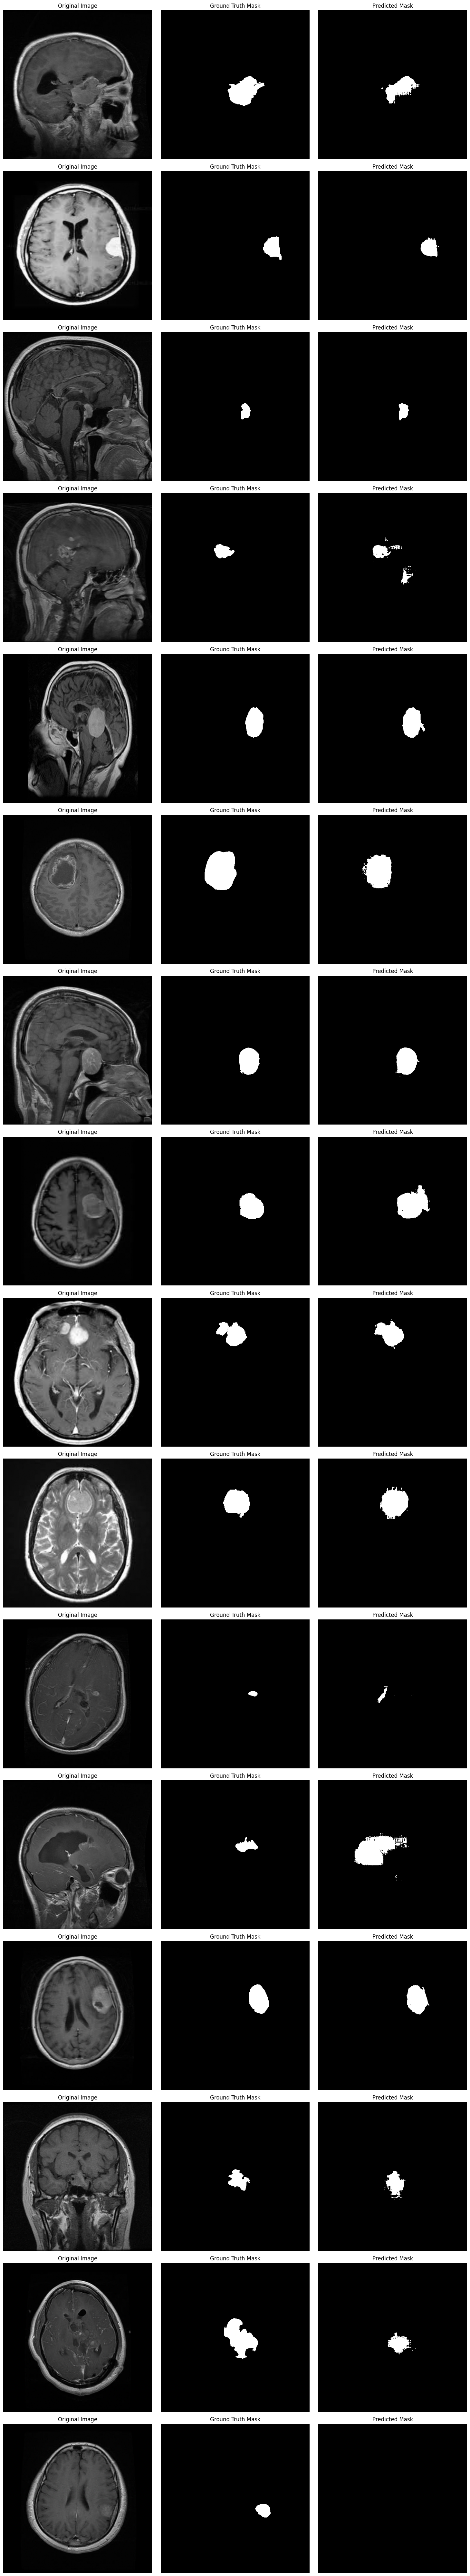

In [ ]:
plot_test(swin_trainer, df_test)
import wandb
wandb.finish()

## Test prediction